# Final Machine Learning Project

## Introduction
**Members**:
- **Huynh Quoc Truong**: *52101007*
- **Dang Thi Minh Thu**: *52100843*
- **Dinh Hoang Phuc**: *52100290*

## Problem Statement
Mục tiêu chính của đề tài: Student Grade Prediction
- Dự đoán điểm thi cuối kỳ của sinh viên dựa trên các thông tin của sinh viên đó.

### Implementation
- **Dataset**: [Student Performance Data Set](/data/student-mat.csv)
**Dataset Information**: Bộ dữ liệu được cung cấp dựa trên thành tiếp học tập của các học sinh trung học ở Bồ Đào Nha. Bộ dữ liệu này có 33 thuộc tính. Các thuộc tính đầu vào bao gồm các thông tin về học sinh như tuổi, giới tính, trường học, địa chỉ, gia đình, các thông tin về thời gian học, các thông tin về các môn học, các thông tin về các kỳ thi trước đó, các thông tin về các hoạt động ngoại khóa, các thông tin về sức khỏe, thói quen học tập, kỳ thi cuối kỳ. Các thuộc tính đầu ra là điểm thi cuối kỳ của sinh viên.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import (
    RandomForestRegressor,
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
#Keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

#matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
# Load dataset
data = pd.read_csv("data/student-mat.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# Show information of dataset
print(f"Length of dataset: {len(data)}")
print(f"Shape of dataset: {data.shape}")
print(f"Columns of dataset: {data.columns}")

Length of dataset: 395
Shape of dataset: (395, 33)
Columns of dataset: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


### Feature Description
- **school** : student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira).
- **sex**: student's sex (binary: 'F' - female or 'M' - male).
- **age**: student's age (numeric: from 15 to 22).
- **address**: student's home address type (binary: 'U' - urban or 'R' - rural).
- **famsize**: family size (binary: 'LE3' - less than or equal to 3 or 'GT3' - greater than 3).
- **Pstatus**: parent's cohabitation status (binary: 'T' - living together or 'A' - apart).
- **Medu**: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education).
- **Fedu**: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education).
- **Mjob**: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other').
- **Fjob**: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other').
- **reason**: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other').
- **guardian**: student's guardian (nominal: 'mother', 'father' or 'other').
- **traveltime**:  home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour).
- **studytime**: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours).
- **failures**: number of past class failures (numeric: n if 0 <= n < 3, else 3).
- **schoolsup**: extra educational support (binary: yes or no).
- **famsup**: family educational support (binary: yes or no).
- **paid**: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no).
- **activities**: extra-curricular activities (binary: yes or no).
- **nursery**: attended nursery school (binary: yes or no).
- **higher**: wants to take higher education (binary: yes or no).
- **internet**: Internet access at home (binary: yes or no).
- **romantic**: with a romantic relationship (binary: yes or no).
- **famrel**: quality of family relationships (numeric: from 1 - very bad to 5 - excellent).
- **freetime**: free time after school (numeric: from 1 - very low to 5 - very high).
- **goout**: going out with friends (numeric: from 1 - very low to 5 - very high).
- **Dalc**: workday alcohol consumption (numeric: from 1 - very low to 5 - very high).
- **Walc**: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high).
- **health**: current health status (numeric: from 1 - very bad to 5 - very good).
- **absences**: number of school absences (numeric: from 0 to 93).

These grades are related with the course subject, Math or Portuguese:
- **G1**: first period grade (numeric: from 0 to 20).
- **G2**: second period grade (numeric: from 0 to 20).
- **G3**: final grade (numeric: from 0 to 20, output target).

In [5]:
# Show information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

Với dữ liệu trên, ta có thể thấy rằng:
- Dữ liệu có 395 dòng và 33 cột.
- Các cột dữ liệu bao gồm các loại khác nhau như: số, chuỗi,...
- Không có cột nào có giá trị null hoặc NaN.

In [17]:
# Show statistical information of dataset
# describe with numeric data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [13]:
# describe with object data
data.describe(include='object').T

,count,unique,top,freq
school,395,2,GP,349
sex,395,2,F,208
address,395,2,U,307
famsize,395,2,GT3,281
Pstatus,395,2,T,354
Mjob,395,5,other,141
Fjob,395,5,other,217
reason,395,4,course,145
guardian,395,3,mother,273
schoolsup,395,2,no,344


Từ những dữ liệu được miêu tả bên trên, ta có thể thấy rằng:
- Trung bình các học sinh nằm trong lứa tuổi từ 16 đến 18 tuổi.
- Thời gian học của các học sinh trung bình là 2 đến 5 giờ mỗi tuần.
- Các học sinh có thói quen uống rượu vào cuối tuần.
- ...

In [20]:
# Numberical data
num_data = data.select_dtypes(include='number')
num_data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [21]:
# Categorical data
cat_data = data.select_dtypes(include='object')
cat_data.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


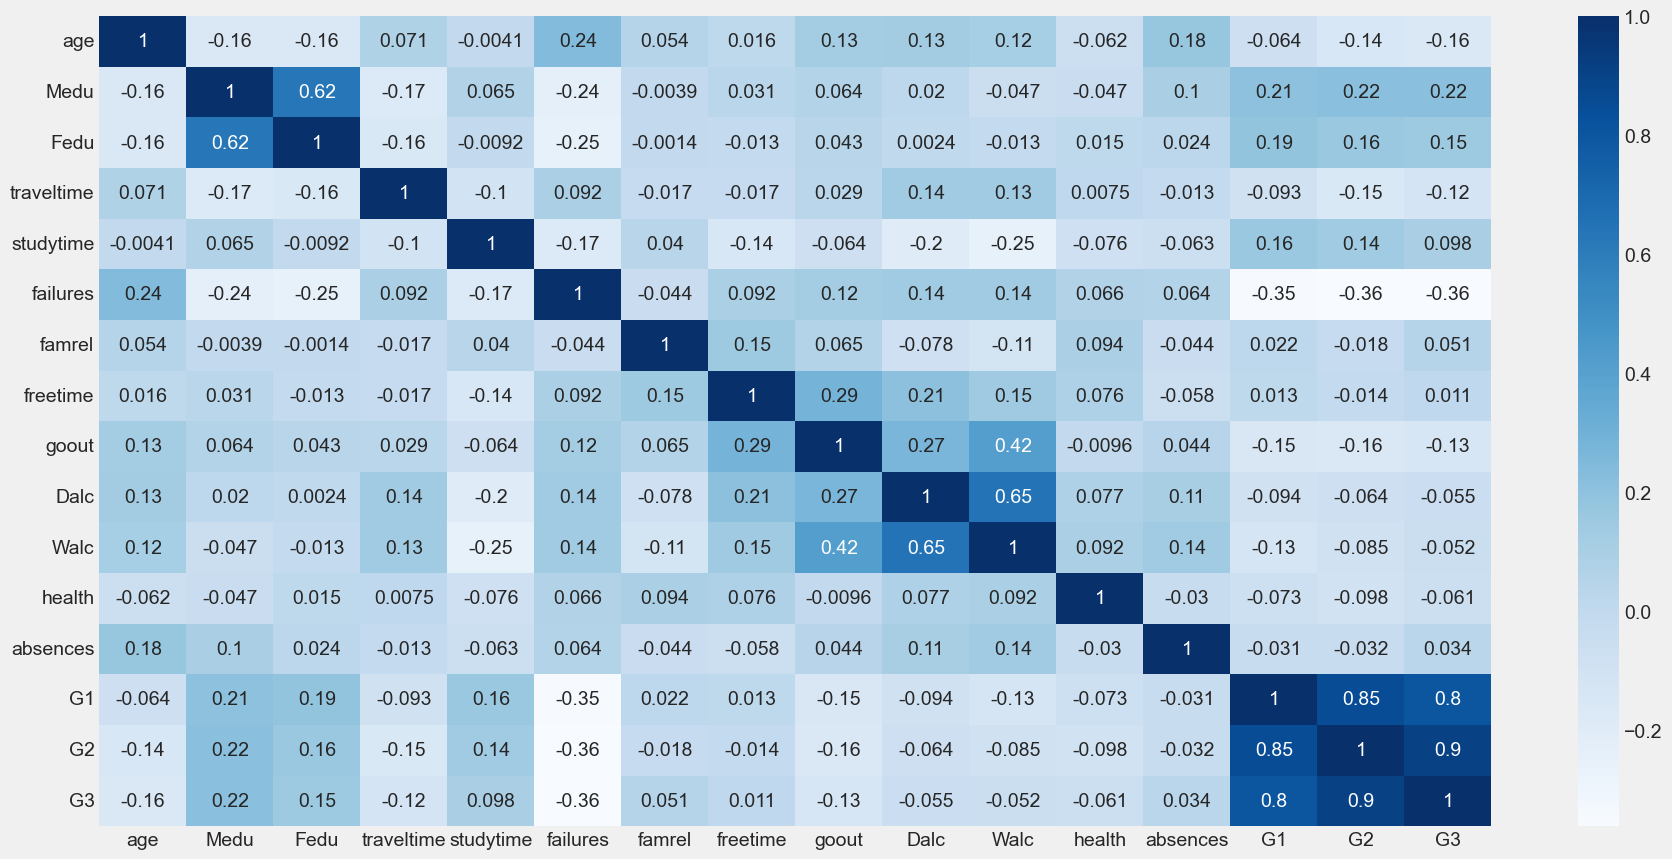

In [23]:
# Show correlation between numerical data
plt.figure(figsize=(20, 10))
sns.heatmap(num_data.corr(), annot=True, cmap='Blues')
plt.show()

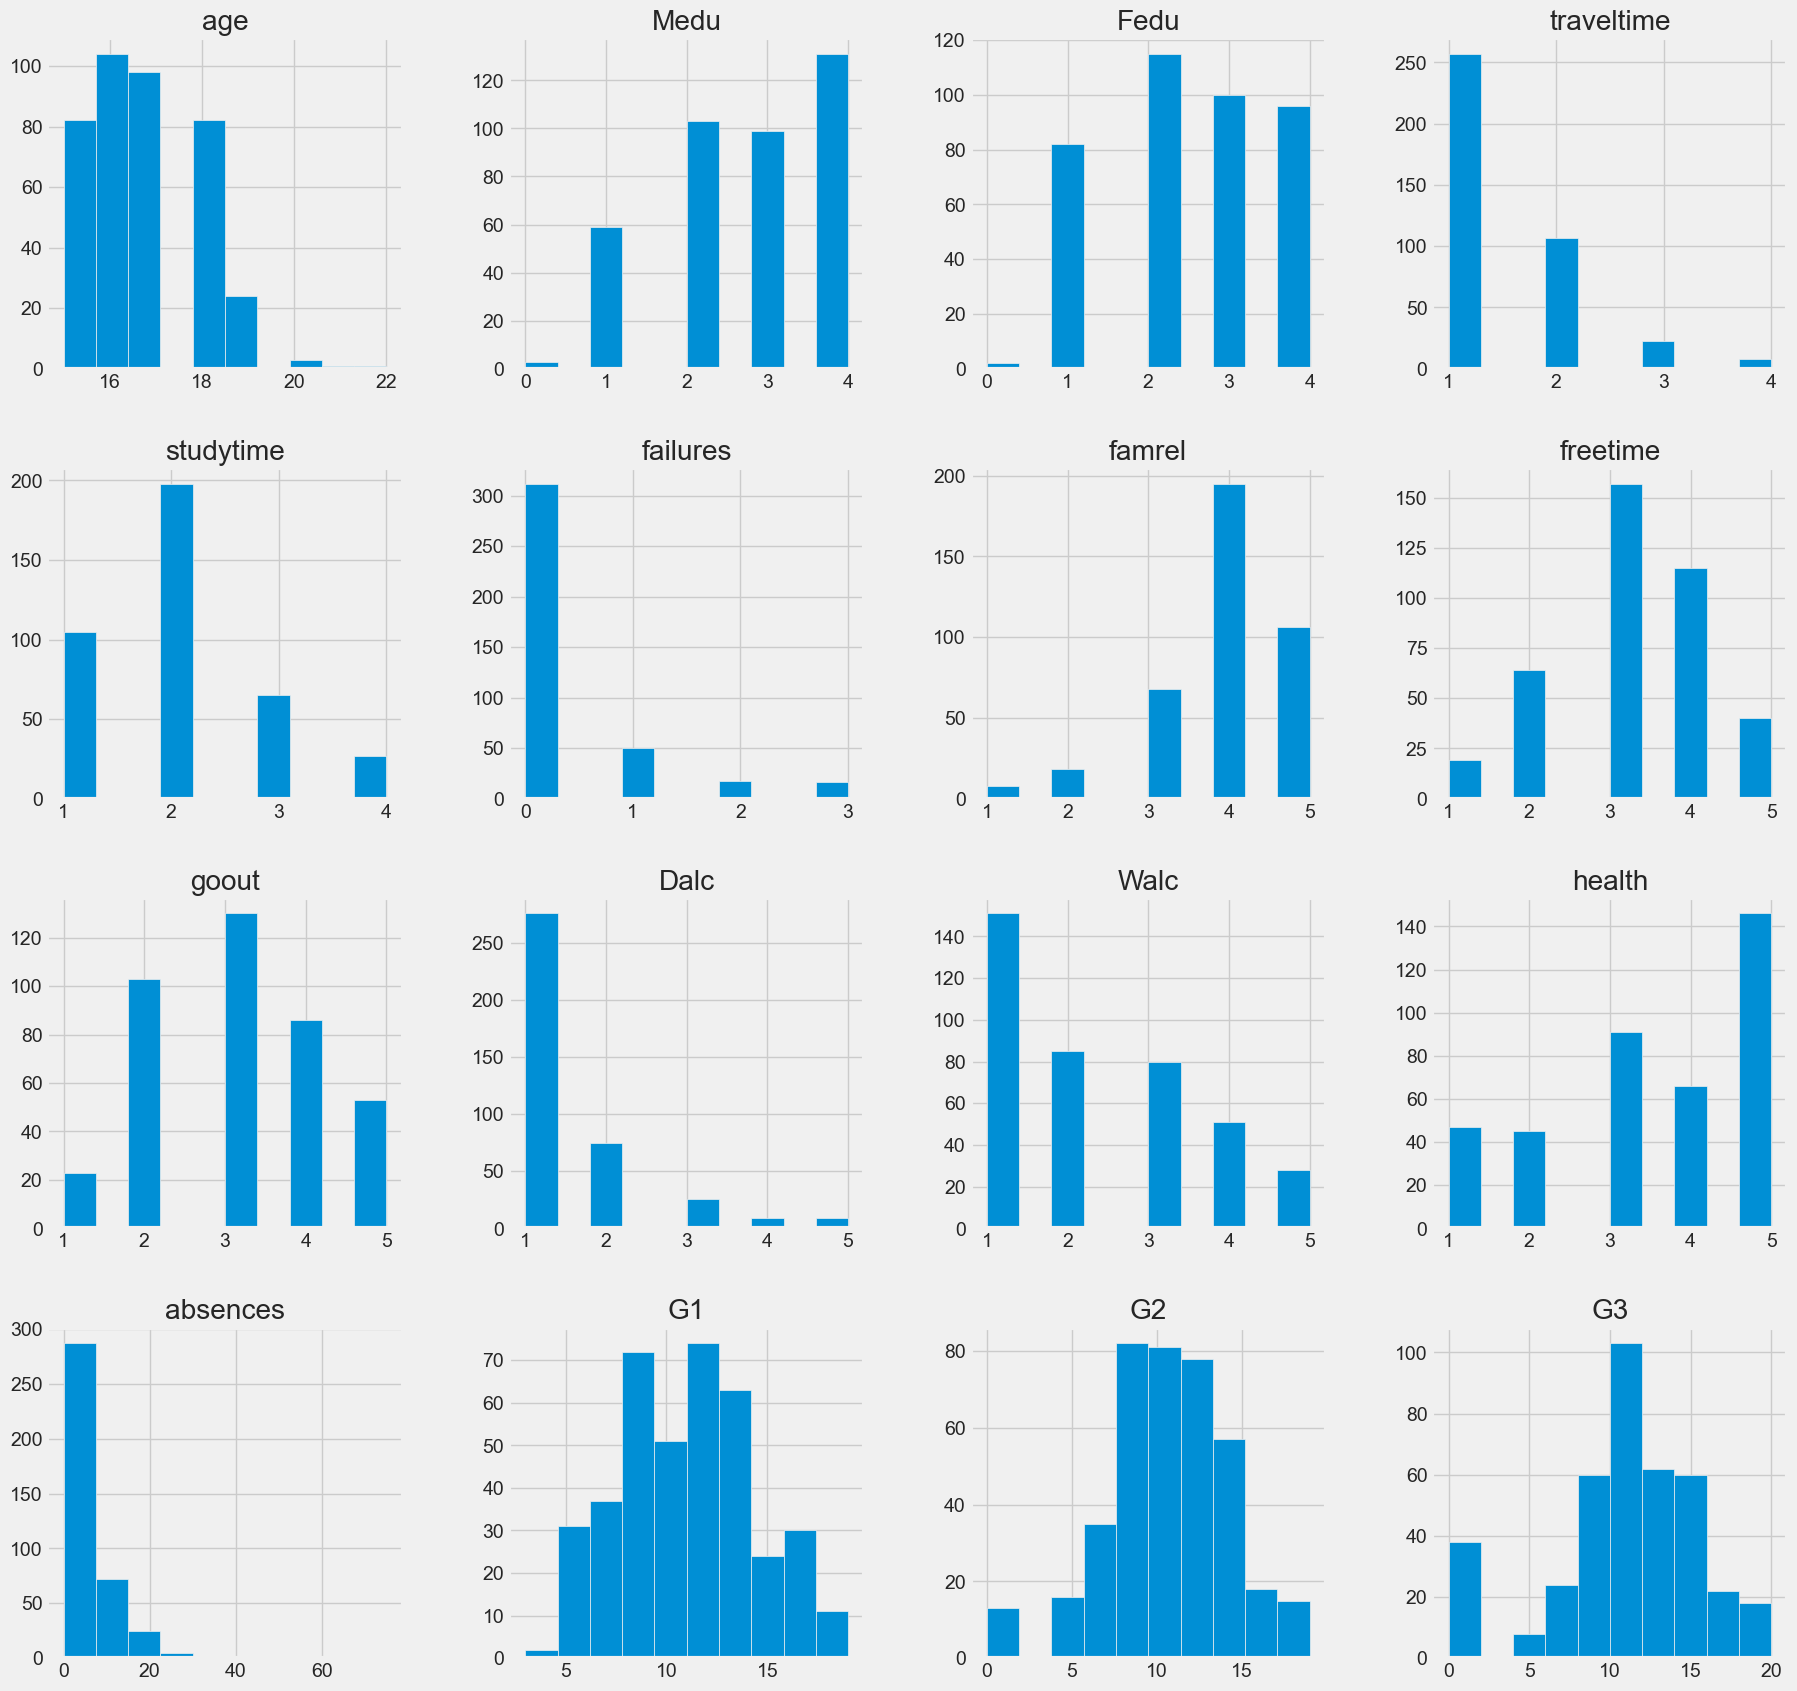

In [27]:
# Show distribution of numerical data
num_data.hist(figsize=(20, 20))
plt.show()

Từ biểu đồ heatmap trên, ta có thể chú ý đến một số features đáng chú ý như:
- Các học sinh có thói quen uống rượu vào cuối tuần (Walc) thường có thói quen uống rượu vào ngày thường (Dalc). Ngoài ra thì thói quen uống rượu vào cuối tuần (Walc) cũng có mối tương quan với việc đi chơi với bạn bè (goout).
- Các học sinh có thói quen học tập nhiều hơn (studytime) thường có kết quả thi cuối kỳ cao hơn (G3).
- Số lần nghỉ học (absences) có mối tương quan với việc đi chơi với bạn bè (goout). Số lần nghỉ học càng nhiều thì kết quả thi cuối kỳ càng thấp.
- Điểm số của kỳ thi trước đó (G1, G2) có mối tương quan cao với kết quả thi cuối kỳ (G3).
- Các học sinh càng có nhiều lỗi vi phạm trong quá khứ (failures) thì kết quả thi cuối kỳ càng thấp.